# Practical: Drawing with Python

## Intro to Matplotlib

To use Matplotlib you need to import it as follows. Moreover, to extend your jupyter notebook with some extra
functionalities for Matplotlib plots you need to use also the magic command `%matplotlib notebook` (In jupyter notebooks
magic commands are those that start with a `%` sign).
This magic command will make you able to zoom, pan, save plots, etc.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt


Matplotlib is building the font cache using fc-list. This may take a moment.


To generate a simple plot you can use the `plot` method of `pyplot`. This method accepts two parameters,
the list of x-values and the list y-values:

<IPython.core.display.Javascript object>


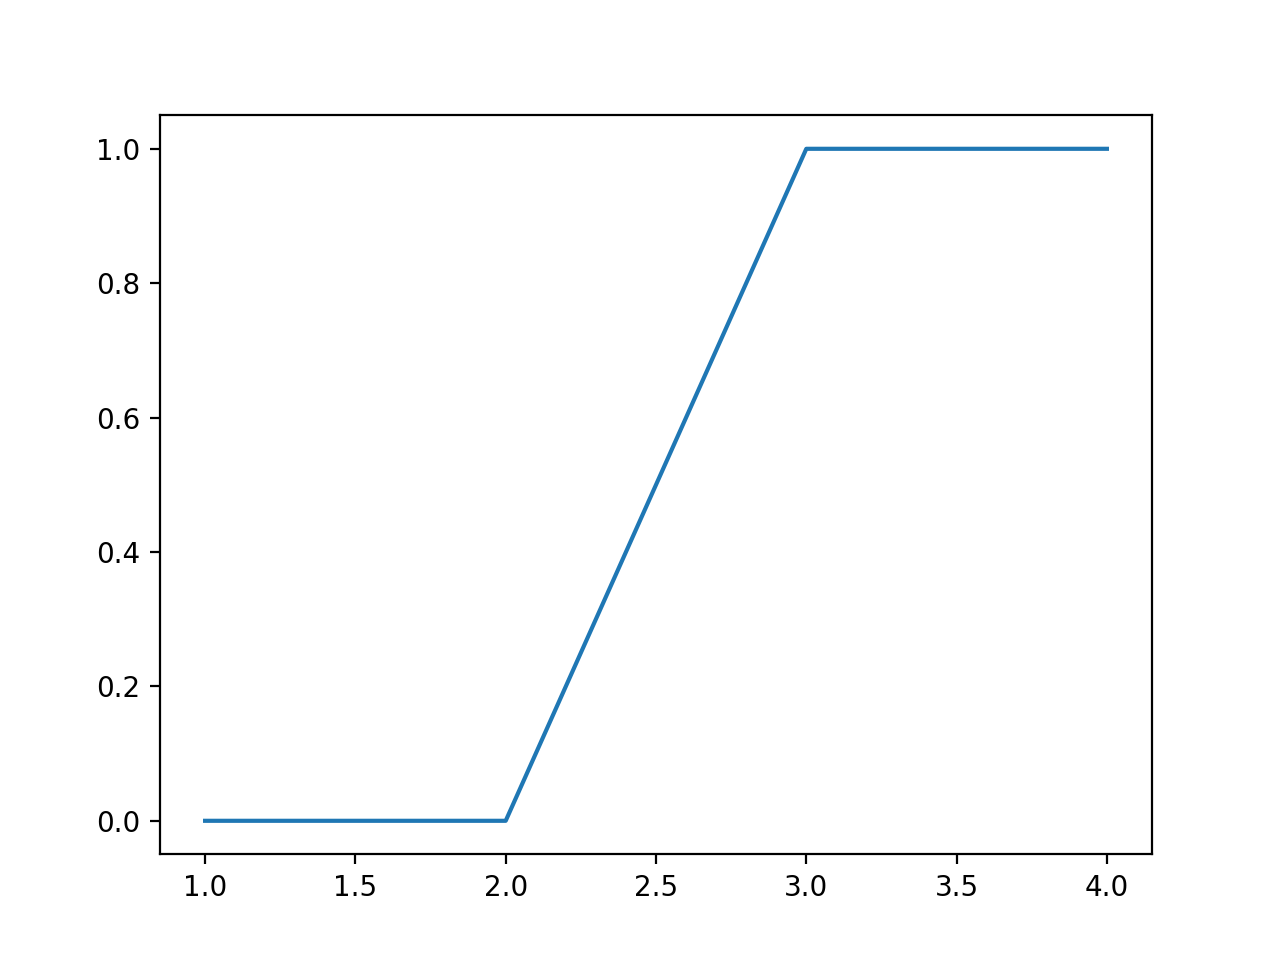

In [2]:
plt.plot([1, 2, 3, 4], [0, 0, 1, 1])
plt.show()


Before continuing to the next code cell, make sure to close the previous plot otherwise the next `pyplot` command
will be overlaid on top of the previous plot. This is also a feature of the magic command.

You can use the same method to draw a polygon by providing the coordinates defining the polygon:

<IPython.core.display.Javascript object>


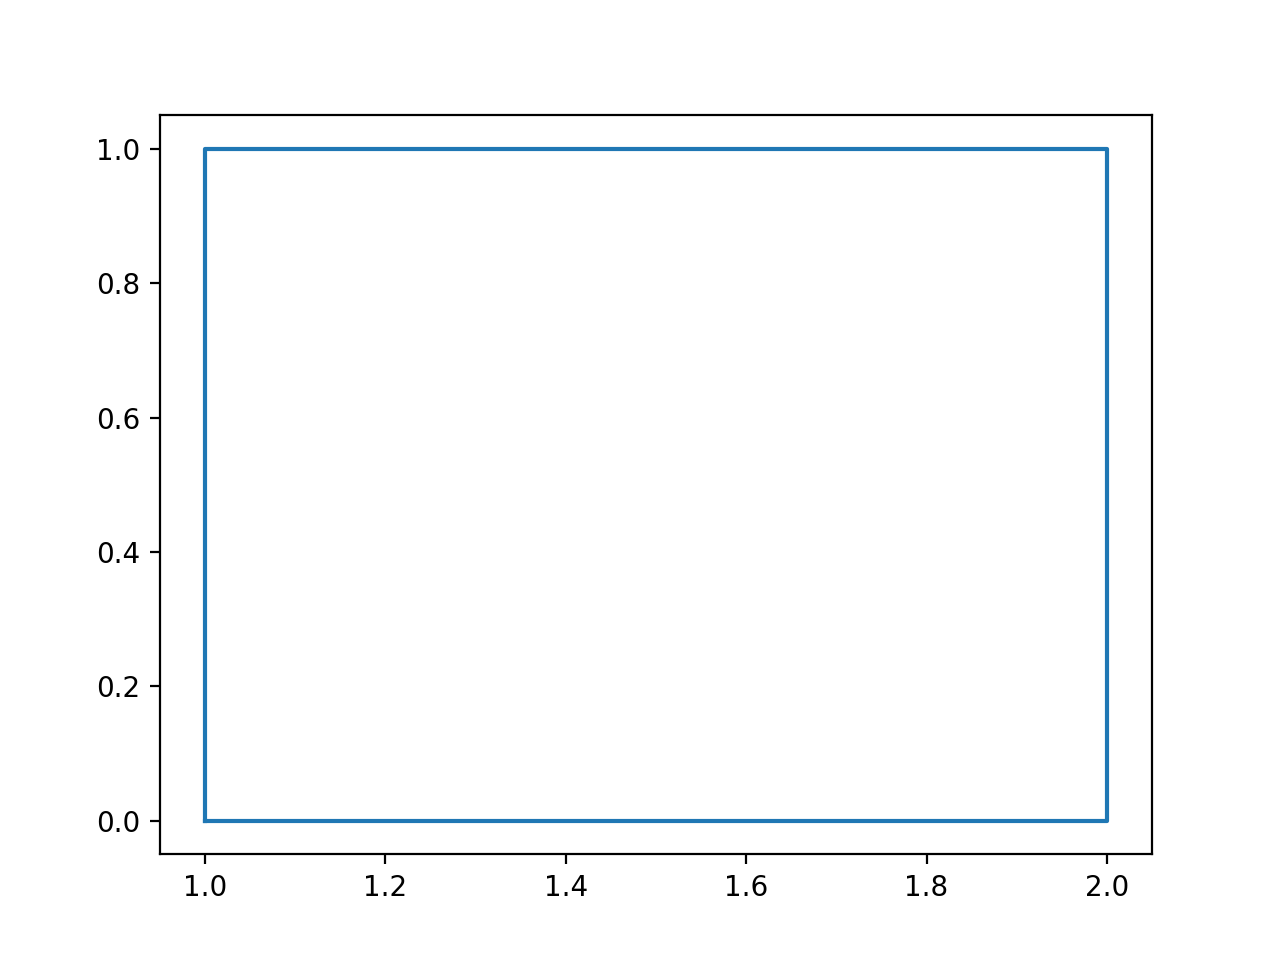

In [3]:
plt.plot([1, 1, 2, 2, 1], [0, 1, 1, 0, 0])
plt.show()


The coordinates provided in the previous code cell defines a square. However, this does not look like a square.
Does it? To make it look like a square you need to tell `matplotlib` to equalize its axes:

<IPython.core.display.Javascript object>


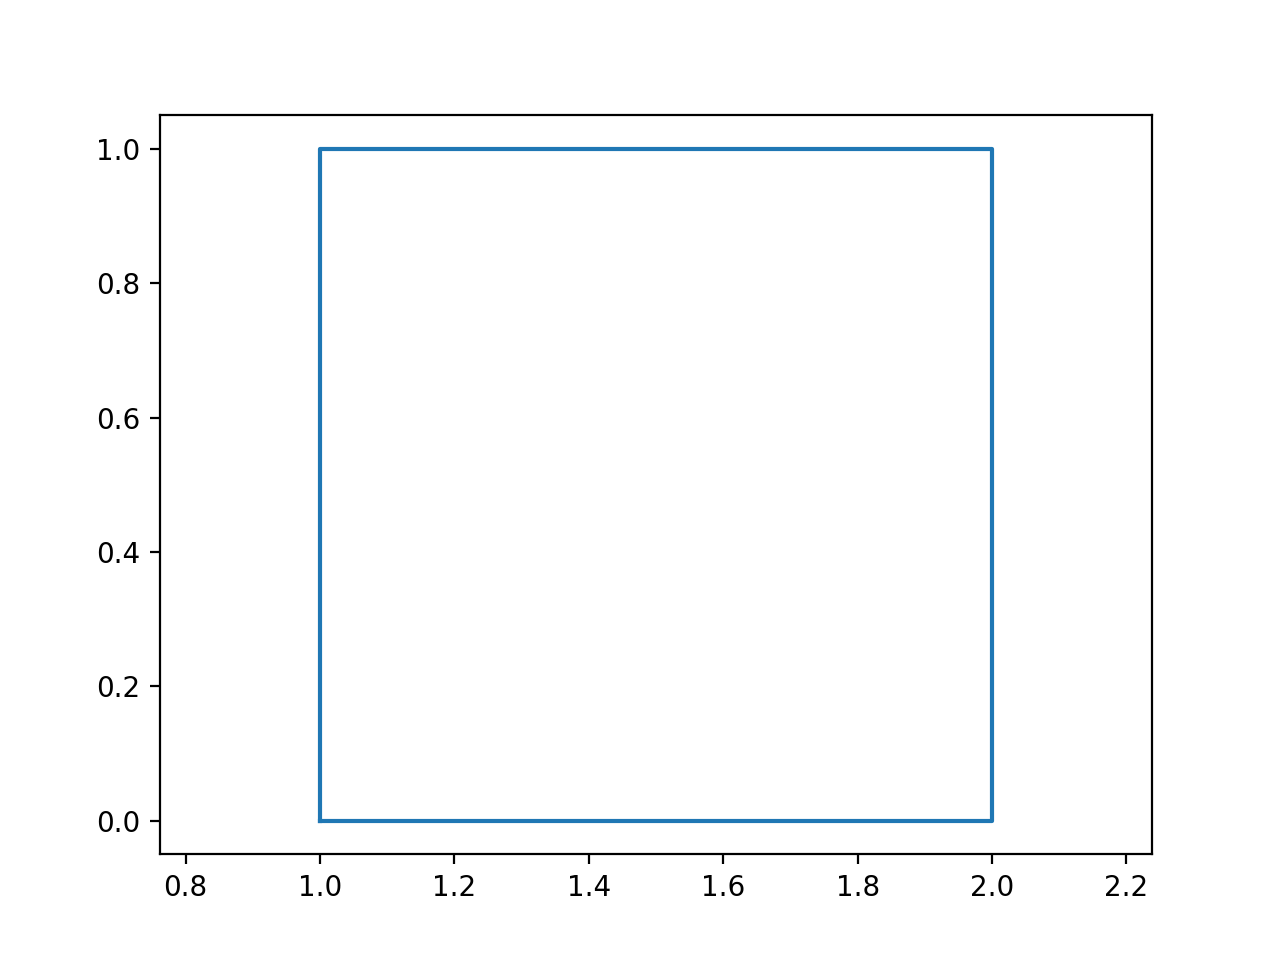

In [4]:
plt.plot([1, 1, 2, 2, 1], [0, 1, 1, 0, 0])
plt.axis('equal')
plt.show()


If you want to draw a filled shape you just need to use `fill` instead of `plot`:

<IPython.core.display.Javascript object>


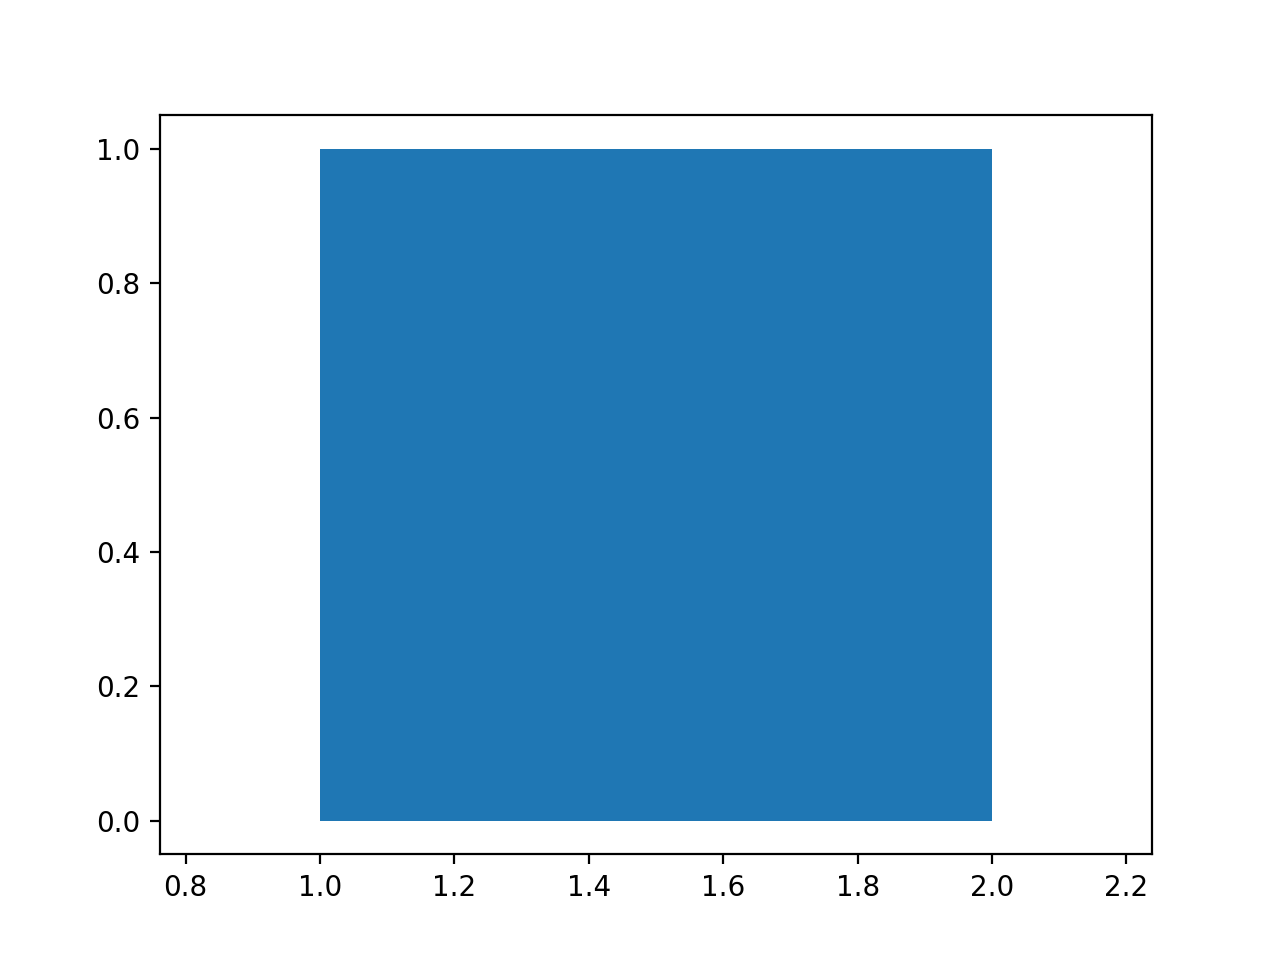

In [5]:
plt.fill([1, 1, 2, 2, 1], [0, 1, 1, 0, 0])
plt.axis('equal')
plt.show()


To quickly format the style of your plot you can use format strings like `ro`. Where `r` stands for red and `o`
for dots.

<IPython.core.display.Javascript object>


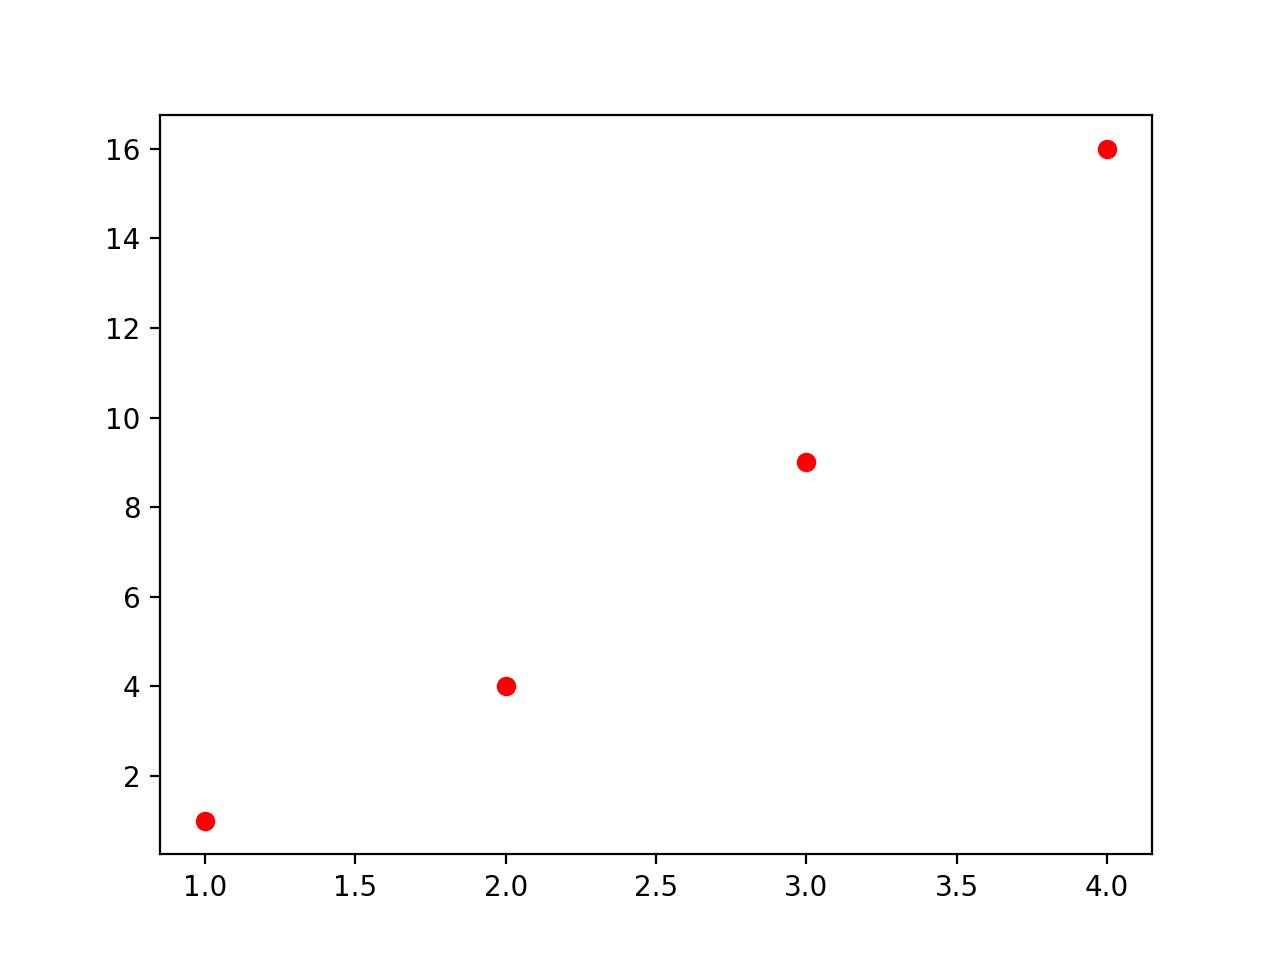

In [6]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.show()


You can overlay plots by executing multiple `pyplot` methods one after the other:

<IPython.core.display.Javascript object>


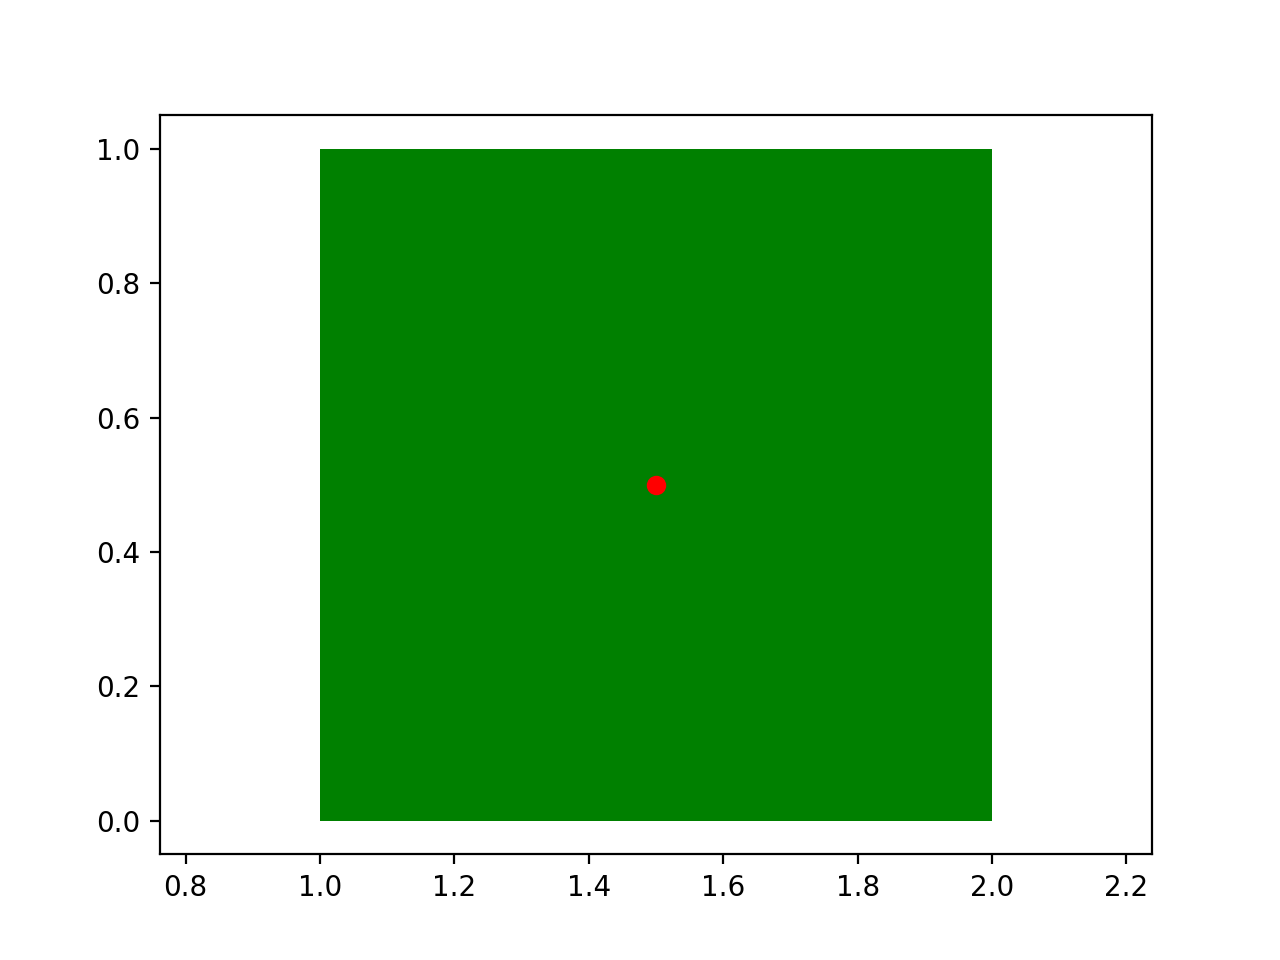

In [7]:
plt.fill([1, 1, 2, 2, 1], [0, 1, 1, 0, 0], 'g')
plt.plot(1.5, 0.5, 'ro')
plt.axis('equal')
plt.show()


If you want to show a legend about your plot, you need to first label each component of your plot and then call the
`legend` method.

<IPython.core.display.Javascript object>


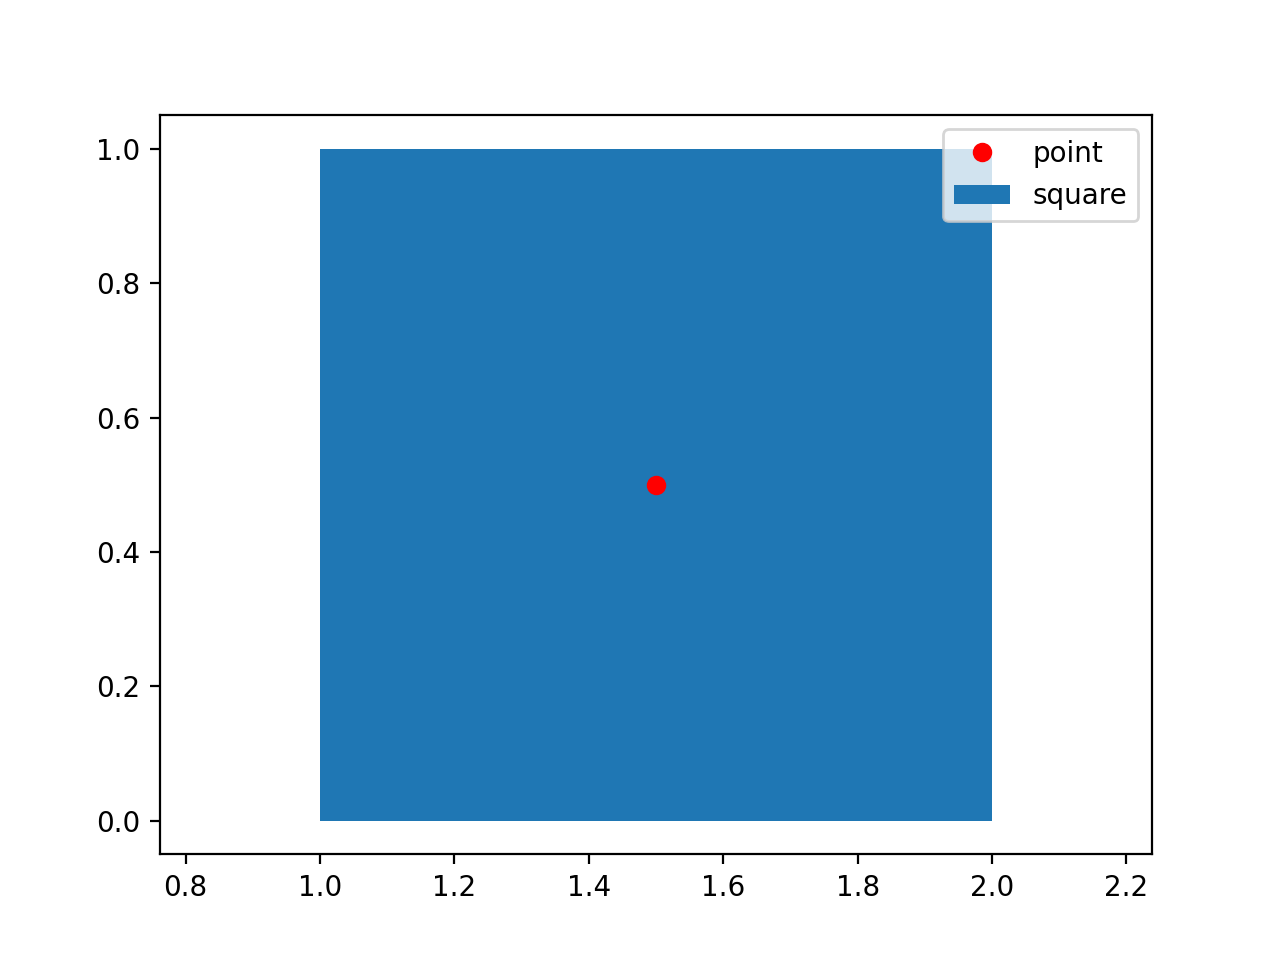

In [8]:
plt.fill([1, 1, 2, 2, 1], [0, 1, 1, 0, 0], label='square')
plt.plot(1.5, 0.5, 'ro', label='point')
plt.axis('equal')
plt.legend()
plt.show()


# Helper Class Plotter

The class defined in the following code cell is a helper class I have provided you for the 1st Assignment. This will
help you plotting points and polygons. As you can see, this implements the same commands you have seen above.

In [12]:
from collections import OrderedDict

class Plotter:

    def __init__(self):
        plt.figure()

    def add_polygon(self, xs, ys):
        plt.fill(xs, ys, 'lightgray', label='Polygon')

    def add_point(self, x, y, kind=None):
        if kind == 'outside':
            plt.plot(x, y, 'ro', label='Outside')
        elif kind == 'boundary':
            plt.plot(x, y, 'bo', label='Boundary')
        elif kind == 'inside':
            plt.plot(x, y, 'go', label='Inside')
        else:
            plt.plot(x, y, 'ko', label='Unclassified')

    def show(self):
        handles, labels = plt.gca().get_legend_handles_labels()
        print(handles,labels)
        by_label = OrderedDict(zip(labels, handles))
        print(by_label)
        plt.legend(by_label.values(), by_label.keys())
        plt.show()
        

To use this class, you first need to create a `Plotter` object. Then, you can draw a polygon by providing its
coordinates using the `add_polygon` method. Finally, you need to call the method show.

<IPython.core.display.Javascript object>


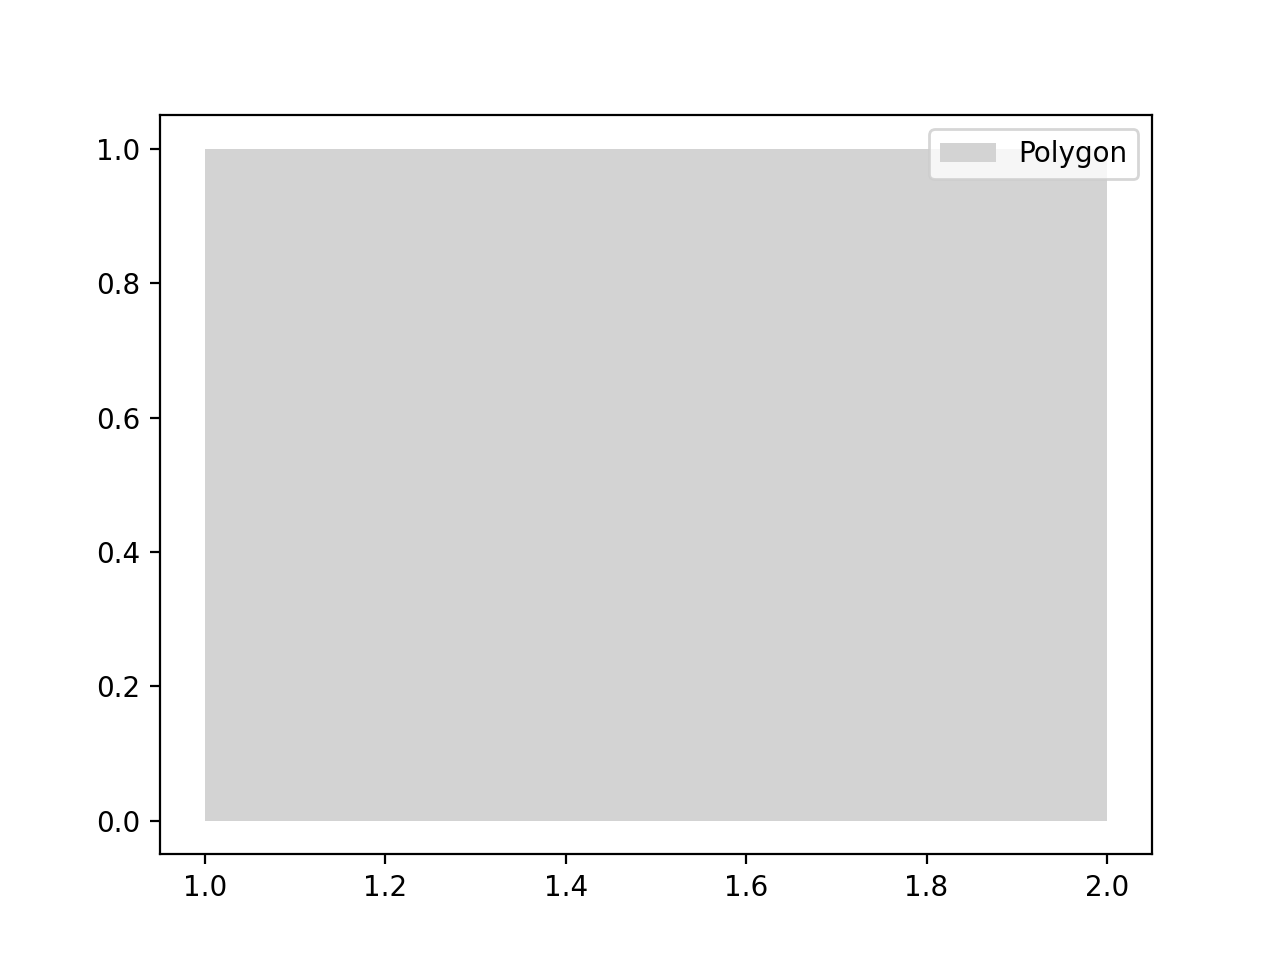

[<matplotlib.patches.Polygon object at 0x118f621c0>] ['Polygon']
OrderedDict([('Polygon', <matplotlib.patches.Polygon object at 0x118f621c0>)])


In [13]:
plotter = Plotter()
plotter.add_polygon([1, 1, 2, 2, 1], [0, 1, 1, 0, 0])
plotter.show()


You can add a point by using the `add_point` method:

<IPython.core.display.Javascript object>


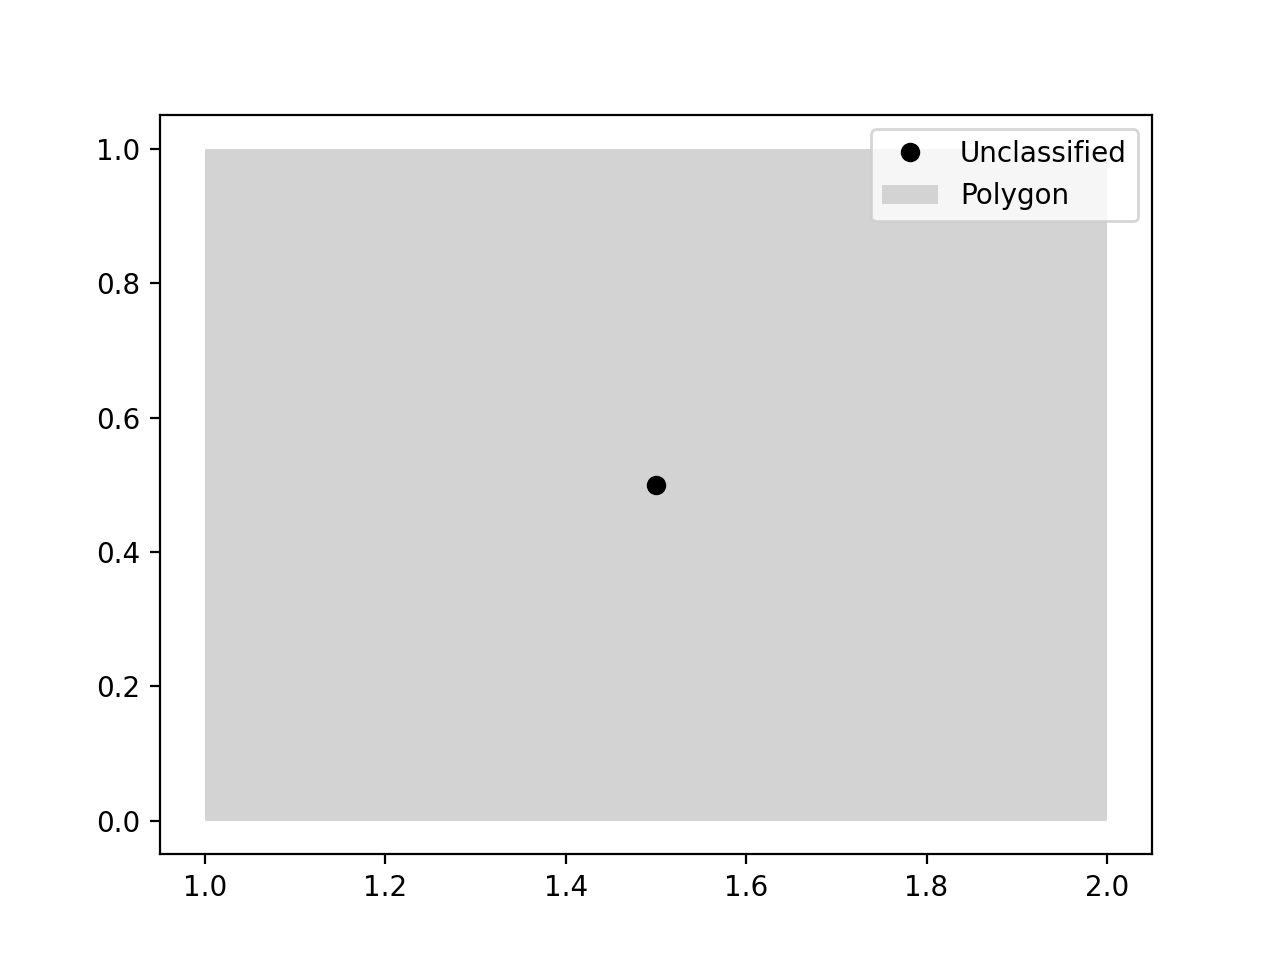

[<matplotlib.lines.Line2D object at 0x11851f220>, <matplotlib.patches.Polygon object at 0x11851f9a0>] ['Unclassified', 'Polygon']
OrderedDict([('Unclassified', <matplotlib.lines.Line2D object at 0x11851f220>), ('Polygon', <matplotlib.patches.Polygon object at 0x11851f9a0>)])


In [14]:
plotter = Plotter()
plotter.add_polygon([1, 1, 2, 2, 1], [0, 1, 1, 0, 0])
plotter.add_point(1.5, 0.5)
plotter.show()


The added point is considered as an unclassified point. If you want to change the label of this point, you need pass a
third argument to the method `add_point`:

<IPython.core.display.Javascript object>


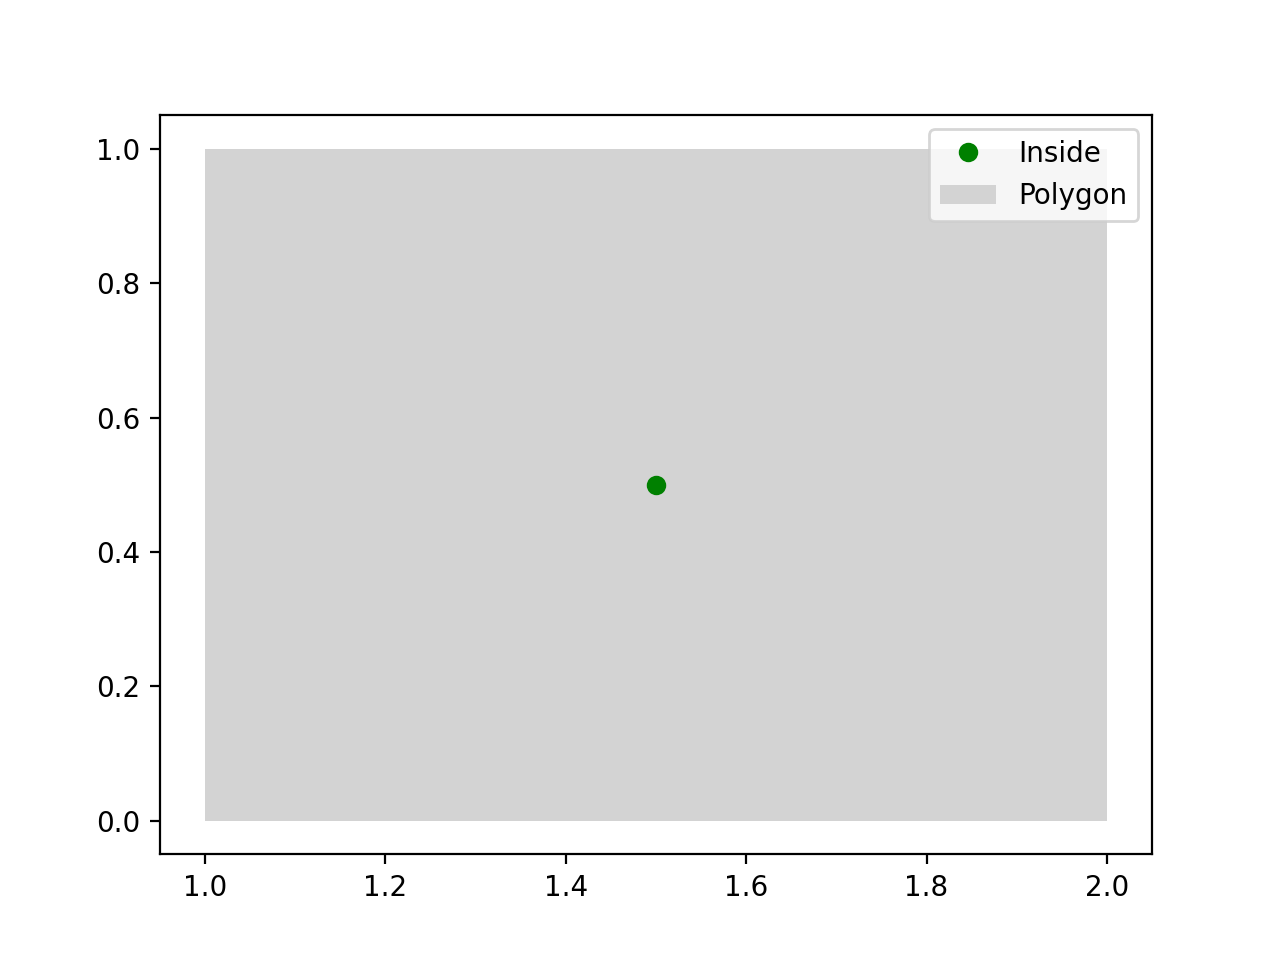

[<matplotlib.lines.Line2D object at 0x11c1fe430>, <matplotlib.patches.Polygon object at 0x11c1fe7c0>] ['Inside', 'Polygon']
OrderedDict([('Inside', <matplotlib.lines.Line2D object at 0x11c1fe430>), ('Polygon', <matplotlib.patches.Polygon object at 0x11c1fe7c0>)])


In [15]:
plotter = Plotter()
plotter.add_polygon([1, 1, 2, 2, 1], [0, 1, 1, 0, 0])
plotter.add_point(1.5, 0.5, 'inside')
plotter.show()


# Exercise 26

Using the `Plotter` object, draw a trapezoid and 3 points: one inside, one outside and one on the boundary of the
trapezoid.